In [2]:
%matplotlib inline
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import entropy as scent
from matplotlib import gridspec
import matplotlib.image as mpimg

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


test_dict = np.load('densenet_BC_100_12.npz')
t_outs = test_dict['outputs']

for t_i in range(t_outs.shape[0]): 
    t_outs[t_i] = softmax(t_outs[t_i])
    
bins = np.load('human_bincounts.npy')
humans = bins / np.sum(bins, axis = 1)[:, np.newaxis]
humans_smoothed = (bins +1) / np.sum(bins, axis = 1)[:, np.newaxis]

ordered_filenames = np.load('decoded_test_filename_order.npy')

labels = ['P', 'A', 'B', 'C', 'De', 'Do', 'F', 'H', 'S', 'T']

im_dir = '/home/battleday/Academic/Berkeley/Superman/local/images/test_images_named'

4806
[ 0.          0.82692308  0.          0.          0.          0.          0.
  0.          0.          0.17307692]
[  7.13436088e-10   9.99946713e-01   2.07311612e-09   2.41735632e-09
   1.18641985e-08   3.77648357e-10   1.75441848e-08   3.65204045e-08
   1.11758034e-08   5.31252008e-05]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

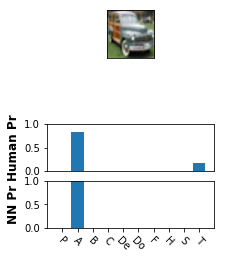

In [3]:
i = np.random.randint(10000)

sample = np.random.sample(np.arange(100000), 10)
print(i)

fig = plt.figure(figsize=(3, 4)) 
gs = gridspec.GridSpec(4, 1)


ax_im_b = plt.subplot(gs[0, 0]) # size of im
im_name_b = ordered_filenames[i]
ax_im_b.xaxis.set_ticklabels([])
ax_im_b.set_xticks([])
ax_im_b.set_yticks([])
        #ax_im_b.set_title(labels[0], fontsize = 12)
ax_im_b.yaxis.set_ticklabels([])
img_b = mpimg.imread(im_dir + '/' + im_name_b)
        #ax_im_b.set_title('High certainty image', fontsize = 20)
ax_im_b.imshow(img_b)


im_guesses = humans[i]
print(im_guesses)
ax_hist_b = plt.subplot(gs[2, 0])
ax_hist_b.bar(np.arange(10), im_guesses) #, align = 'left')
ax_hist_b.set_xlim([-1, 10])
ax_hist_b.set_ylim([0, 1]) 
ax_hist_b.set_xticks([])

ax_hist_b.set_ylabel('Human Pr', fontsize = 12, fontweight = 'bold')

im_guesses = t_outs[i]
print(im_guesses)
ax_hist_n = plt.subplot(gs[3, 0])
ax_hist_n.bar(np.arange(10), im_guesses) #, align = 'left')
ax_hist_n.set_xlim([-1, 10])
ax_hist_n.set_ylim([0, 1]) 

ax_hist_n.set_ylabel('NN Pr', fontsize = 12, fontweight = 'bold') 
ax_hist_n.xaxis.set_ticks(np.arange(10))
ax_hist_n.xaxis.set_ticklabels(labels)
plt.xticks(rotation = -45, ha='center')

Text(0,0.5,'model entropy')

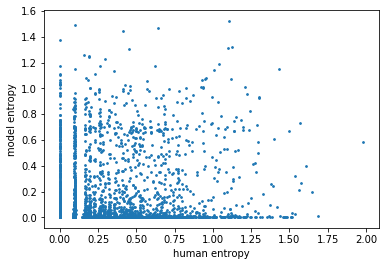

In [5]:
plt.scatter(scent(humans.T), scent(t_outs.T), s=3)
plt.xlabel('human entropy')
plt.ylabel('model entropy')